In [ ]:
import qiskit
import sys
# add the parent directory to the system path
sys.path.append("..")
from sane_applications.qft_qpe.algos import standard_qpe

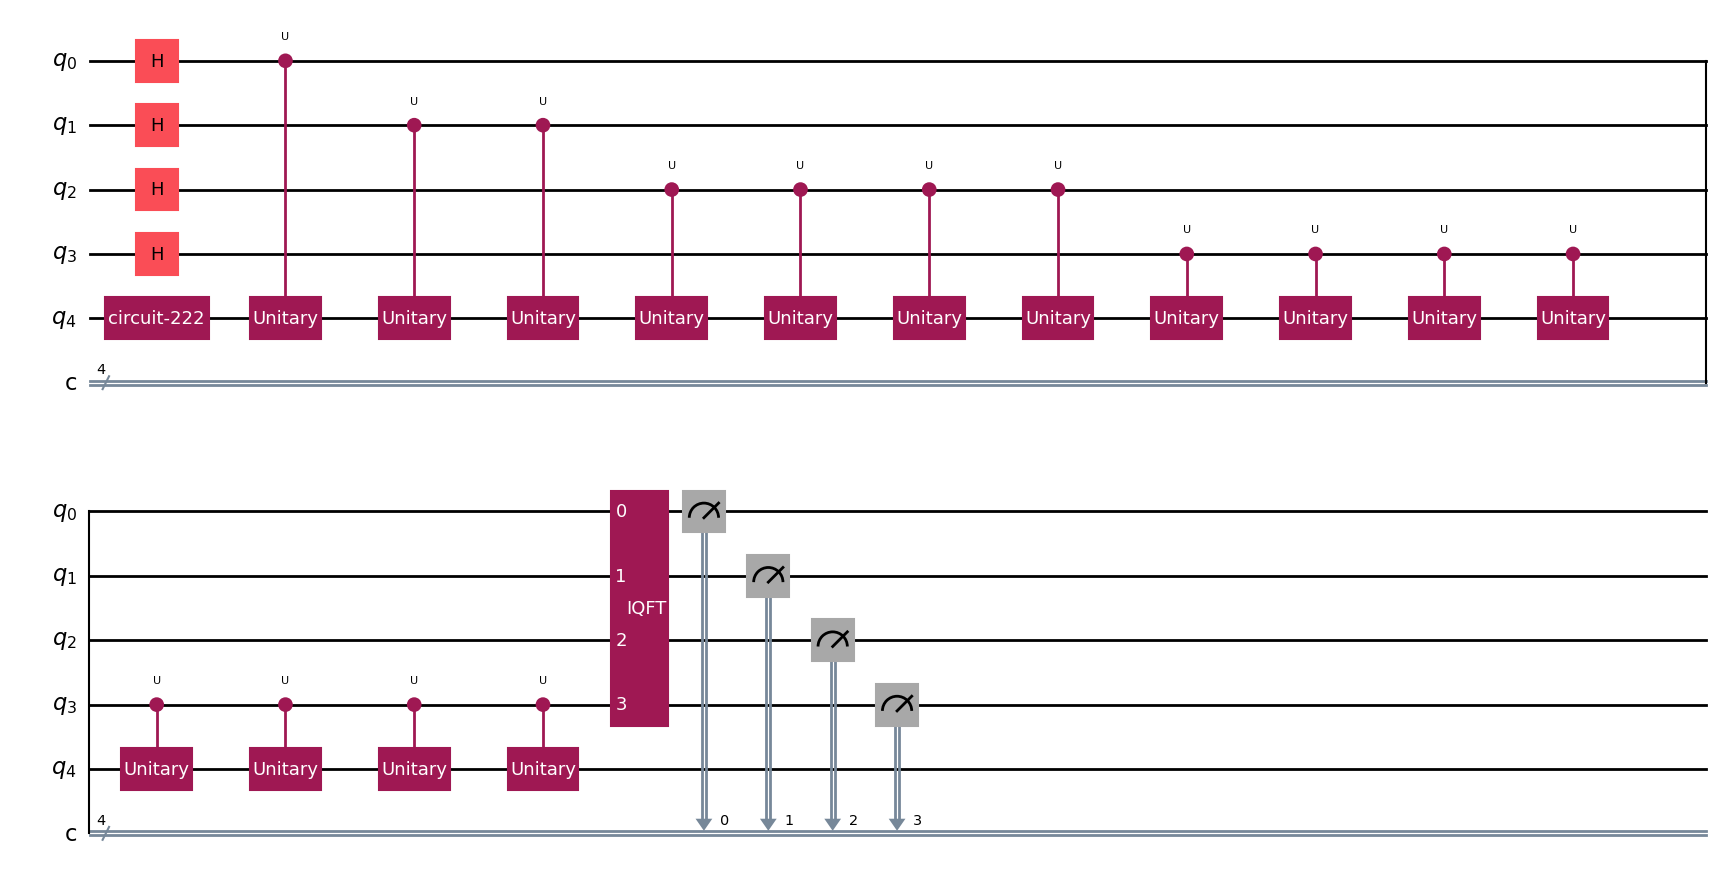

In [8]:
import qiskit.circuit
import qiskit.quantum_info



H = qiskit.quantum_info.SparsePauliOp.from_list([("I", 1.0), ("X", 0.5), ("Z", 0.5)])
t = 1
U = qiskit.circuit.library.PauliEvolutionGate(operator=H, time=t, label="$e^{-i" + str(t) + "H}$")
U = qiskit.quantum_info.Operator(U)
eigenstate = qiskit.quantum_info.Statevector.from_label("0" * H.num_qubits)
eigenstate_circuit = qiskit.QuantumCircuit(H.num_qubits)
eigenstate_circuit.initialize(eigenstate, range(H.num_qubits))
qc = standard_qpe(unitary=U, eigenstate=eigenstate_circuit, num_ancilla=4)
qc.draw(("mpl"))

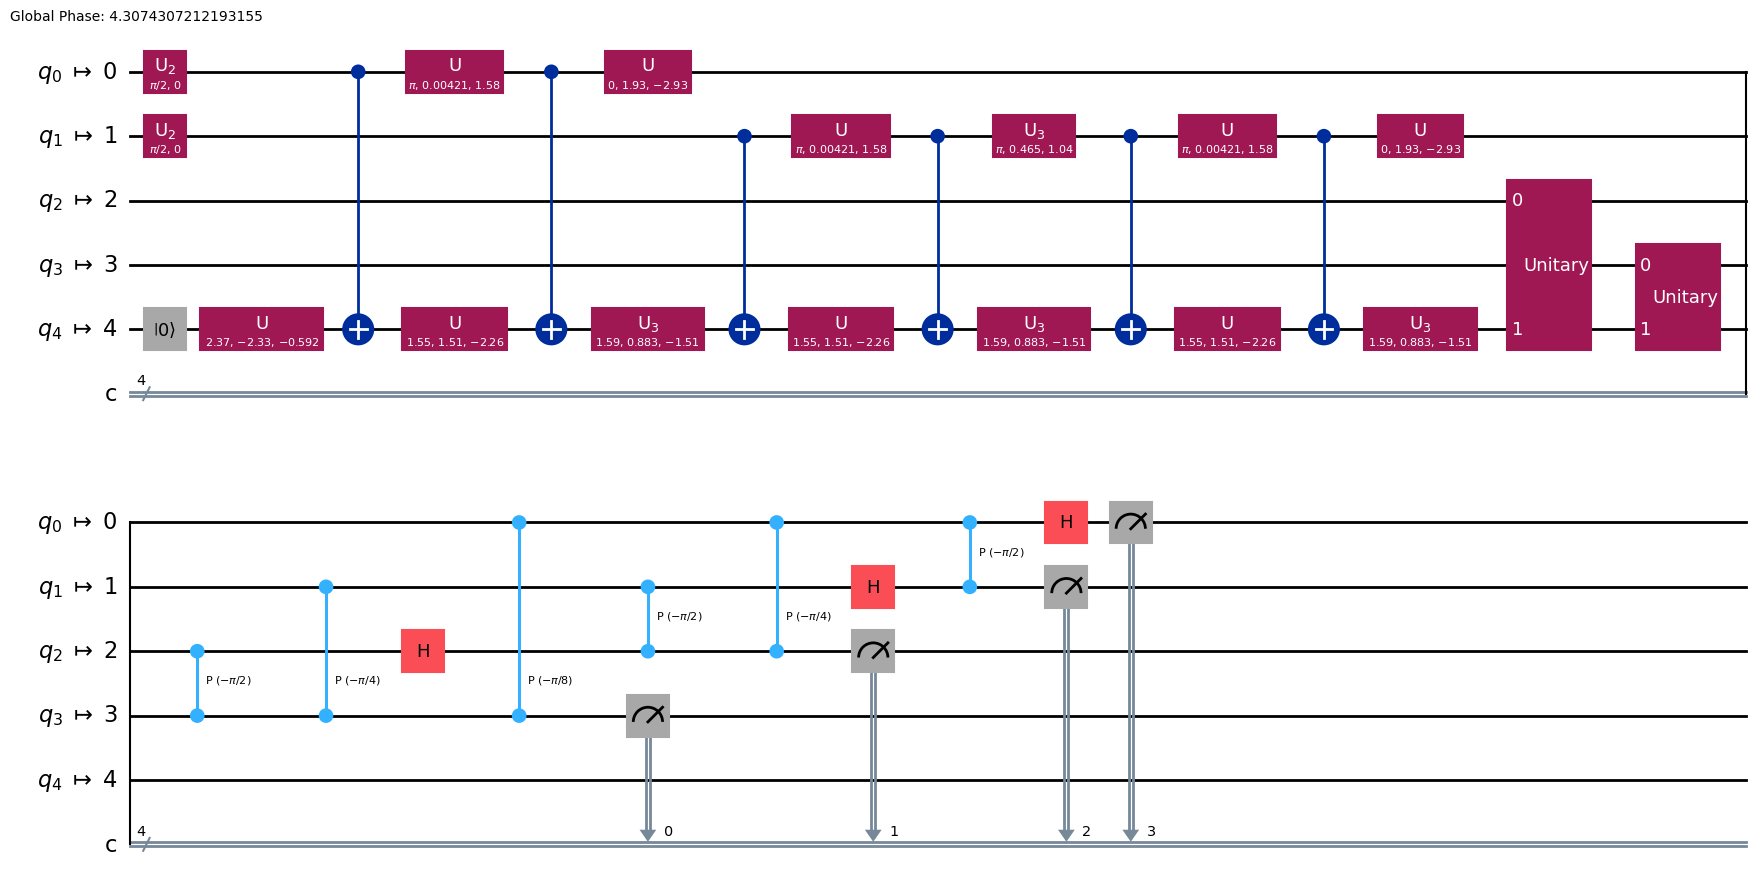

In [11]:
# Basic simulator
from qiskit.providers.basic_provider import BasicSimulator
from qiskit import transpile
simulator_basic = BasicSimulator()
qc_transpiled = transpile(qc, simulator_basic)
qc_transpiled.draw("mpl")

In [15]:
job = simulator_basic.run(qc_transpiled, shots=1024)
result_basic = job.result()
result_basic.get_counts()


{'1011': 121,
 '1010': 23,
 '1100': 634,
 '1111': 143,
 '1101': 36,
 '1110': 19,
 '0000': 19,
 '1001': 7,
 '0101': 4,
 '1000': 4,
 '0110': 4,
 '0001': 2,
 '0010': 6,
 '0111': 2}